In [41]:
import pandas as pd
import numpy as np
from Preprocessing import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier, SGDRegressor, Lasso , Ridge
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
import xgboost as xgb
from eli5 import show_weights
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [8]:
Withcategorie = pd.read_csv('data/rdyforml/Withcategorie.csv')
Withdeuxcentdummies = pd.read_csv('data/rdyforml/Withdeuxcentdummies.csv')
SalarycategWithcategorie = pd.read_csv('data/rdyforml/SalarycategWithcategorie.csv')
SalarycategWithdeuxcentdummies = pd.read_csv('data/rdyforml/SalarycategWithdeuxcentdummies.csv')

In [9]:
Withcategorie = Withcategorie.drop(['TypeContrat','Description','Link'],axis=1)
Withdeuxcentdummies = Withdeuxcentdummies.drop(['TypeContrat','Description','Link'],axis=1)
SalarycategWithcategorie = SalarycategWithcategorie.drop(['TypeContrat','Description','Link'],axis=1)
SalarycategWithdeuxcentdummies = SalarycategWithdeuxcentdummies.drop(['TypeContrat','Description','Link'],axis=1)

In [10]:
Withcategorie_traintest = Withcategorie[Withcategorie['Salary'] != 'notfound']
Withcategorie_apredict = Withcategorie[Withcategorie['Salary'] == 'notfound']
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Withdeuxcentdummies_traintest = Withdeuxcentdummies[Withdeuxcentdummies['Salary'] != 'notfound']
Withdeuxcentdummies_apredict = Withdeuxcentdummies[Withdeuxcentdummies['Salary'] == 'notfound']
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
SalarycategWithcategorie_traintest = SalarycategWithcategorie[SalarycategWithcategorie['Salary'] != 'notfound']
SalarycategWithcategorie_apredict = SalarycategWithcategorie[SalarycategWithcategorie['Salary'] == 'notfound']
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
SalarycategWithdeuxcentdummies_traintest = SalarycategWithdeuxcentdummies[SalarycategWithdeuxcentdummies['Salary'] != 'notfound']
SalarycategWithdeuxcentdummies_apredict = SalarycategWithdeuxcentdummies[SalarycategWithdeuxcentdummies['Salary'] == 'notfound']

In [11]:
y1=Withcategorie_traintest.pop('Salary')
DumsWithcategorie_traintest =pd.get_dummies(Withcategorie_traintest)
X1=DumsWithcategorie_traintest
Xtrain1,Xtest1,ytrain1,ytest1 = train_test_split(X1,y1,test_size= 0.3)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
y2=Withdeuxcentdummies_traintest.pop('Salary')
DumsWithdeuxcentdummies_traintest =pd.get_dummies(Withdeuxcentdummies_traintest)
X2=DumsWithdeuxcentdummies_traintest
Xtrain2,Xtest2,ytrain2,ytest2 = train_test_split(X2,y2,test_size= 0.3)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
y3=SalarycategWithcategorie_traintest.pop('Salary')
DumsSalarycategWithcategorie_traintest =pd.get_dummies(SalarycategWithcategorie_traintest)
X3=DumsSalarycategWithcategorie_traintest
Xtrain3,Xtest3,ytrain3,ytest3 = train_test_split(X3,y3,test_size= 0.3)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
y4=SalarycategWithdeuxcentdummies_traintest.pop('Salary')
DumsSalarycategWithdeuxcentdummies_traintest =pd.get_dummies(SalarycategWithdeuxcentdummies_traintest)
X4=DumsSalarycategWithdeuxcentdummies_traintest
Xtrain4,Xtest4,ytrain4,ytest4 = train_test_split(X4,y4,test_size= 0.3)

<h1 style='text-align:center'>Random Forest </h1>

In [8]:
parametre = {
    'n_estimators': np.arange(10,90,10),
    'criterion': ('mae','mse'),
    'max_depth': np.arange(2,6),
    'min_samples_split': np.arange(2,5),
    'max_features':('auto','sqrt','log2', None),
    'bootstrap':(True,False)
}
clf = RandomForestRegressor(max_depth=2, random_state=0)
Forest1 = GridSearchCV(clf, parametre,verbose=1,n_jobs=4)
Forest1.fit(Xtrain1, ytrain1)
ypred1 = Forest1.predict(Xtest1)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Forest2 = GridSearchCV(clf, parametre,verbose=1,n_jobs=4)
Forest2.fit(Xtrain2, ytrain2)
ypred2 = Forest2.predict(Xtest2)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
params = {'n_estimators':[50],
          'criterion':['gini','entropy'],
          'max_depth': np.arange(2,5),
          'max_features':['auto','sqrt','log2',None],
          'bootstrap':[True,False]
         }
thetree = RandomForestClassifier(random_state=7)
Forest3 = GridSearchCV(thetree, params,verbose=1,n_jobs=4)
Forest3.fit(Xtrain3, ytrain3)
ypred3 = Forest3.predict(Xtest3)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Forest4 = GridSearchCV(thetree, params,verbose=1,n_jobs=4)
Forest4.fit(Xtrain4, ytrain4)
ypred4 = Forest4.predict(Xtest4)

Fitting 3 folds for each of 1536 candidates, totalling 4608 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.6s
[Parallel(n_jobs=4)]: Done 308 tasks      | elapsed:   22.1s
[Parallel(n_jobs=4)]: Done 674 tasks      | elapsed:   57.0s
[Parallel(n_jobs=4)]: Done 1156 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 2690 tasks      | elapsed:  3.2min
[Parallel(n_jobs=4)]: Done 3444 tasks      | elapsed:  5.9min
[Parallel(n_jobs=4)]: Done 4608 out of 4608 | elapsed:  6.3min finished
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify

Fitting 3 folds for each of 1536 candidates, totalling 4608 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   10.5s
[Parallel(n_jobs=4)]: Done 251 tasks      | elapsed:   29.9s
[Parallel(n_jobs=4)]: Done 558 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done 952 tasks      | elapsed:  3.6min
[Parallel(n_jobs=4)]: Done 2419 tasks      | elapsed:  5.4min
[Parallel(n_jobs=4)]: Done 3134 tasks      | elapsed:  9.8min
[Parallel(n_jobs=4)]: Done 4390 tasks      | elapsed: 13.3min
[Parallel(n_jobs=4)]: Done 4608 out of 4608 | elapsed: 13.4min finished
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=4)]: Done 128 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 137 out of 144 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 144 out of 144 | elapsed:    2.2s finished
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be les

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=4)]: Done 128 tasks      | elapsed:    2.5s
[Parallel(n_jobs=4)]: Done 137 out of 144 | elapsed:    2.7s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 144 out of 144 | elapsed:    3.0s finished
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


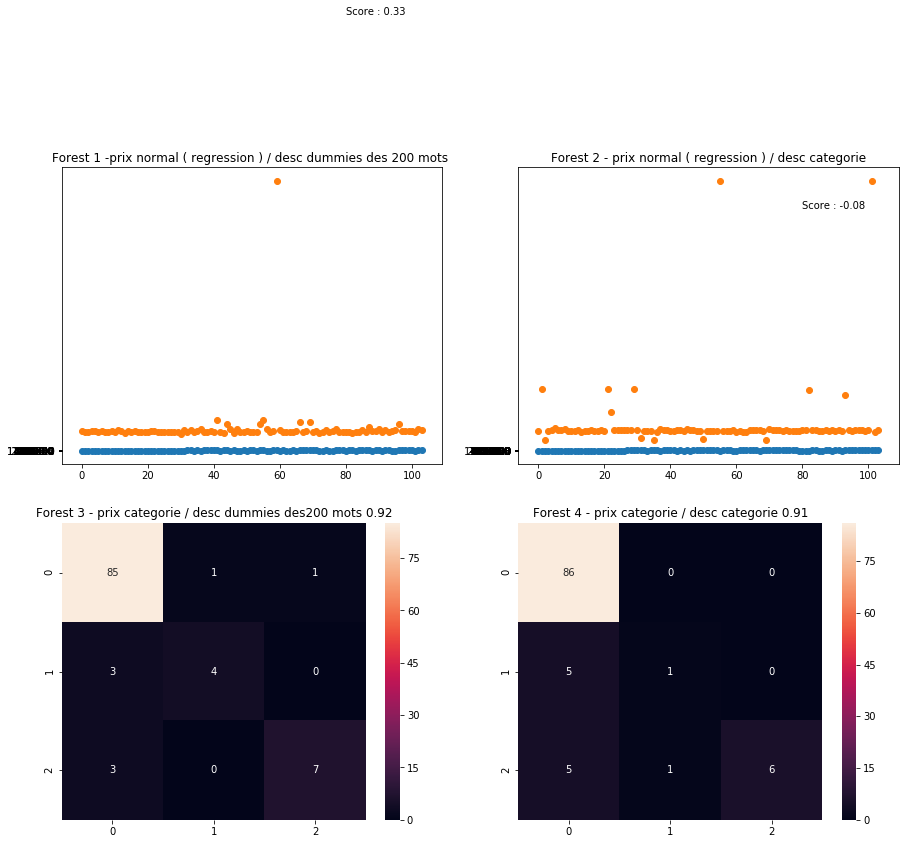

In [9]:
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
plt.scatter(range(len(ytest1)),ytest1)
plt.scatter(range(len(ypred1)),ypred1)
plt.text(80,500000,"Score : "+str(round(Forest1.best_estimator_.score(Xtest1,ytest1),2)))
plt.title("Forest 1 -prix normal ( regression ) / desc dummies des 200 mots ")
plt.subplot(2,2,2)
plt.scatter(range(len(ytest2)),ytest2)
plt.scatter(range(len(ypred2)),ypred2)
plt.text(80,500000,"Score : "+str(round(Forest2.best_estimator_.score(Xtest2,ytest2),2)))
plt.title("Forest 2 - prix normal ( regression ) / desc categorie")
plt.subplot(2,2,3)
conf3 = confusion_matrix(ytest3,ypred3)
sns.heatmap(conf3,annot=True)
plt.title("Forest 3 - prix categorie / desc dummies des200 mots "+ str(round(Forest3.best_score_,2)))
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.subplot(2,2,4)
conf4 = confusion_matrix(ytest4,ypred4)
sns.heatmap(conf4,annot=True)
plt.plot(label="Score : "+str(Forest4.best_score_))
plt.title("Forest 4 - prix categorie / desc categorie "+ str(round(Forest4.best_score_,2)))
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

In [10]:
print(classification_report(ytest3,ypred3))
print(classification_report(ytest4,ypred4))

               precision    recall  f1-score   support

    25a60Kans       0.93      0.98      0.96        87
   60a200Kans       0.80      0.57      0.67         7
moinsde25Kans       0.88      0.70      0.78        10

     accuracy                           0.92       104
    macro avg       0.87      0.75      0.80       104
 weighted avg       0.92      0.92      0.92       104

               precision    recall  f1-score   support

    25a60Kans       0.90      1.00      0.95        86
   60a200Kans       0.50      0.17      0.25         6
moinsde25Kans       1.00      0.50      0.67        12

     accuracy                           0.89       104
    macro avg       0.80      0.56      0.62       104
 weighted avg       0.89      0.89      0.87       104



In [ ]:
print('Forest 1',Forest1.best_params_)
print('Forest 2',Forest2.best_params_)
print('Forest 3',Forest3.best_params_)
print('Forest 4',Forest4.best_params_)

<h1 style='text-align:center'>XG Boost </h1>

In [2]:
Withcategorie = pd.read_csv('data/rdyforml/Withcategorie.csv')
Withdeuxcentdummies = pd.read_csv('data/rdyforml/Withdeuxcentdummies.csv')
SalarycategWithcategorie = pd.read_csv('data/rdyforml/SalarycategWithcategorie.csv')
SalarycategWithdeuxcentdummies = pd.read_csv('data/rdyforml/SalarycategWithdeuxcentdummies.csv')

In [3]:
Withcategorie = Withcategorie.drop(['TypeContrat','Description','Link'],axis=1)
Withdeuxcentdummies = Withdeuxcentdummies.drop(['TypeContrat','Description','Link'],axis=1)
SalarycategWithcategorie = SalarycategWithcategorie.drop(['TypeContrat','Description','Link'],axis=1)
SalarycategWithdeuxcentdummies = SalarycategWithdeuxcentdummies.drop(['TypeContrat','Description','Link'],axis=1)

In [4]:
Withcategorie_traintest = Withcategorie[Withcategorie['Salary'] != 'notfound']
Withcategorie_apredict = Withcategorie[Withcategorie['Salary'] == 'notfound']
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Withdeuxcentdummies_traintest = Withdeuxcentdummies[Withdeuxcentdummies['Salary'] != 'notfound']
Withdeuxcentdummies_apredict = Withdeuxcentdummies[Withdeuxcentdummies['Salary'] == 'notfound']
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
SalarycategWithcategorie_traintest = SalarycategWithcategorie[SalarycategWithcategorie['Salary'] != 'notfound']
SalarycategWithcategorie_apredict = SalarycategWithcategorie[SalarycategWithcategorie['Salary'] == 'notfound']
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
SalarycategWithdeuxcentdummies_traintest = SalarycategWithdeuxcentdummies[SalarycategWithdeuxcentdummies['Salary'] != 'notfound']
SalarycategWithdeuxcentdummies_apredict = SalarycategWithdeuxcentdummies[SalarycategWithdeuxcentdummies['Salary'] == 'notfound']

In [5]:
Sc = StandardScaler()
y1=Withcategorie_traintest.pop('Salary')
DumsWithcategorie_traintest =pd.get_dummies(Withcategorie_traintest)
Sc.fit(DumsWithcategorie_traintest)
SCDumsWithcategorie_traintest = Sc.transform(DumsWithcategorie_traintest)
SCDumsWithcategorie_traintest= pd.DataFrame(SCDumsWithcategorie_traintest,columns=DumsWithcategorie_traintest.columns)
X1=SCDumsWithcategorie_traintest
Xtrain1,Xtest1,ytrain1,ytest1 = train_test_split(X1,y1,test_size= 0.3)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
y2=Withdeuxcentdummies_traintest.pop('Salary')
DumsWithdeuxcentdummies_traintest =pd.get_dummies(Withdeuxcentdummies_traintest)
SCDumsWithdeuxcentdummies_traintest = Sc.fit_transform(DumsWithdeuxcentdummies_traintest)
X2=SCDumsWithdeuxcentdummies_traintest
Xtrain2,Xtest2,ytrain2,ytest2 = train_test_split(X2,y2,test_size= 0.3)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
y3=SalarycategWithcategorie_traintest.pop('Salary')
DumsSalarycategWithcategorie_traintest =pd.get_dummies(SalarycategWithcategorie_traintest)
X3=DumsSalarycategWithcategorie_traintest
Xtrain3,Xtest3,ytrain3,ytest3 = train_test_split(X3,y3,test_size= 0.3)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
y4=SalarycategWithdeuxcentdummies_traintest.pop('Salary')
DumsSalarycategWithdeuxcentdummies_traintest =pd.get_dummies(SalarycategWithdeuxcentdummies_traintest)
X4=DumsSalarycategWithdeuxcentdummies_traintest
Xtrain4,Xtest4,ytrain4,ytest4 = train_test_split(X4,y4,test_size= 0.3)

In [83]:
parametre= {
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5]
}
xg_reg = xgb.XGBRegressor(objective='reg:tweedie')
ytrain1 = pd.to_numeric(ytrain1)
Xgboost1 = GridSearchCV(xg_reg, parametre,verbose=1,n_jobs=4)
Xgboost1.fit(Xtrain1, ytrain1)
ypredXgboost1 = Xgboost1.predict(Xtest1)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
ytrain2 = pd.to_numeric(ytrain2)
Xgboost2 = GridSearchCV(xg_reg, parametre,verbose=1,n_jobs=4)
Xgboost2.fit(Xtrain2, ytrain2)
ypredXgboost2 = Xgboost2.predict(Xtest2)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
parametre = {
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5]
}
clf = XGBClassifier(random_state=0)
Xgboost3 = GridSearchCV(clf, parametre,verbose=1,n_jobs=4)
Xgboost3.fit(Xtrain3, ytrain3)
ypredXgboost3 = Xgboost3.predict(Xtest3)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Xgboost4 = GridSearchCV(clf, parametre,verbose=1,n_jobs=4)
Xgboost4.fit(Xtrain4, ytrain4)
ypredXgboost4 = Xgboost4.predict(Xtest4)

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 405 candidates, totalling 1215 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   13.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   33.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 1215 out of 1215 | elapsed:  1.8min finished
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 3 folds for each of 405 candidates, totalling 1215 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   17.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   42.7s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 1215 out of 1215 | elapsed:  2.4min finished
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 3 folds for each of 405 candidates, totalling 1215 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   27.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done 1215 out of 1215 | elapsed:  3.6min finished
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-pa

Fitting 3 folds for each of 405 candidates, totalling 1215 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    9.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   43.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  3.5min
[Parallel(n_jobs=4)]: Done 1215 out of 1215 | elapsed:  5.8min finished
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


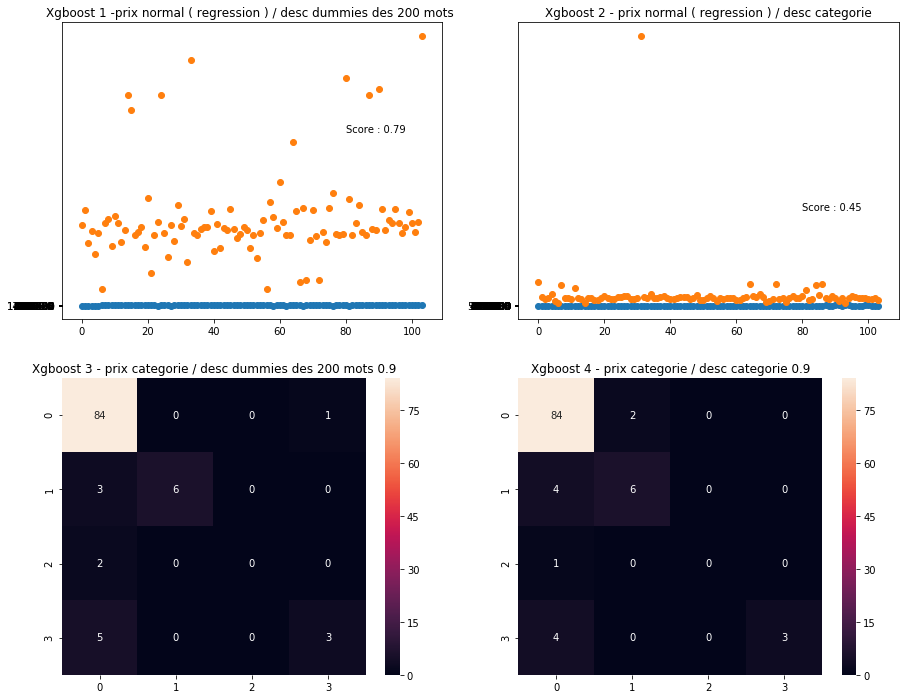

In [84]:
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
plt.scatter(range(len(ytest1)),ytest1)
plt.scatter(range(len(ypredXgboost1)),ypredXgboost1)
plt.text(80,90000,"Score : "+str(round(Xgboost1.best_estimator_.score(Xtest1,ytest1),2)))
plt.title("Xgboost 1 -prix normal ( regression ) / desc dummies des 200 mots ")
plt.subplot(2,2,2)
plt.scatter(range(len(ytest2)),ytest2)
plt.scatter(range(len(ypredXgboost2)),ypredXgboost2)
plt.text(80,500000,"Score : "+str(round(Xgboost2.best_estimator_.score(Xtest2,ytest2),2)))
plt.title("Xgboost 2 - prix normal ( regression ) / desc categorie")
plt.subplot(2,2,3)
conf3 = confusion_matrix(ytest3,ypredXgboost3)
sns.heatmap(conf3,annot=True)
plt.title("Xgboost 3 - prix categorie / desc dummies des 200 mots "+ str(round(Xgboost3.best_score_,2)))
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.subplot(2,2,4)
conf4 = confusion_matrix(ytest4,ypredXgboost4)
sns.heatmap(conf4,annot=True)
plt.plot(label="Score : "+str(Xgboost4.best_score_))
plt.title("Xgboost 4 - prix categorie / desc categorie "+ str(round(Xgboost4.best_score_,2)))
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

In [85]:
print(classification_report(ytest3,ypredXgboost3))
print(classification_report(ytest4,ypredXgboost4))

                         precision    recall  f1-score   support

              25a60Kans       0.89      0.99      0.94        85
             60a200Kans       1.00      0.67      0.80         9
millionnairestoutlesans       0.00      0.00      0.00         2
          moinsde25Kans       0.75      0.38      0.50         8

               accuracy                           0.89       104
              macro avg       0.66      0.51      0.56       104
           weighted avg       0.87      0.89      0.87       104

                         precision    recall  f1-score   support

              25a60Kans       0.90      0.98      0.94        86
             60a200Kans       0.75      0.60      0.67        10
millionnairestoutlesans       0.00      0.00      0.00         1
          moinsde25Kans       1.00      0.43      0.60         7

               accuracy                           0.89       104
              macro avg       0.66      0.50      0.55       104
           weighted 

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
print('Xgboost 1',Xgboost1.best_params_)
print('Xgboost 2',Xgboost2.best_params_)
print('Xgboost 3',Xgboost3.best_params_)
print('Xgboost 4',Xgboost4.best_params_)

<h1 style='text-align:center'>SGD model </h1>

In [109]:
parametre = {
    'alpha': 10.0 ** -np.arange(1, 7),
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
}
sgdr = SGDRegressor()
SGDRegressor1 = GridSearchCV(sgdr, parametre,verbose=1,n_jobs=4)
SGDRegressor1.fit(Xtrain1, ytrain1)
ypredSGDRegressor1 = SGDRegressor1.predict(Xtest1)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
SGDRegressor2 = GridSearchCV(sgdr, parametre,verbose=1,n_jobs=4)
SGDRegressor2.fit(Xtrain2, ytrain2)
ypredSGDRegressor2 = SGDRegressor2.predict(Xtest2)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
parametre = {
    'alpha' : 10.0**-np.arange(1,7),
    'l1_ratio':[.05, .15, .5, .7, .9, .95, .99, 1]
}
sgdc = SGDClassifier()
SGDClassifier3 = GridSearchCV(sgdc, parametre,verbose=1,n_jobs=4)
SGDClassifier3.fit(Xtrain3, ytrain3)
ypredSGDClassifier3 = SGDClassifier3.predict(Xtest3)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
SGDClassifier4 = GridSearchCV(sgdc, parametre,verbose=1,n_jobs=4)
SGDClassifier4.fit(Xtrain4, ytrain4)
ypredSGDClassifier4 = SGDClassifier4.predict(Xtest4)

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 162 candidates, totalling 486 fits


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    7.4s
[Parallel(n_jobs=4)]: Done 260 tasks      | elapsed:   27.4s
[Parallel(n_jobs=4)]: Done 486 out of 486 | elapsed:   52.9s finished
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarn

Fitting 3 folds for each of 162 candidates, totalling 486 fits


[Parallel(n_jobs=4)]: Done  62 tasks      | elapsed:    7.1s
[Parallel(n_jobs=4)]: Done 212 tasks      | elapsed:   29.0s
[Parallel(n_jobs=4)]: Done 476 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 486 out of 486 | elapsed:  1.1min finished
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=4)]: Done 130 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 144 out of 144 | elapsed:    0.5s finished
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=4

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=4)]: Done 130 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 144 out of 144 | elapsed:    0.7s finished
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


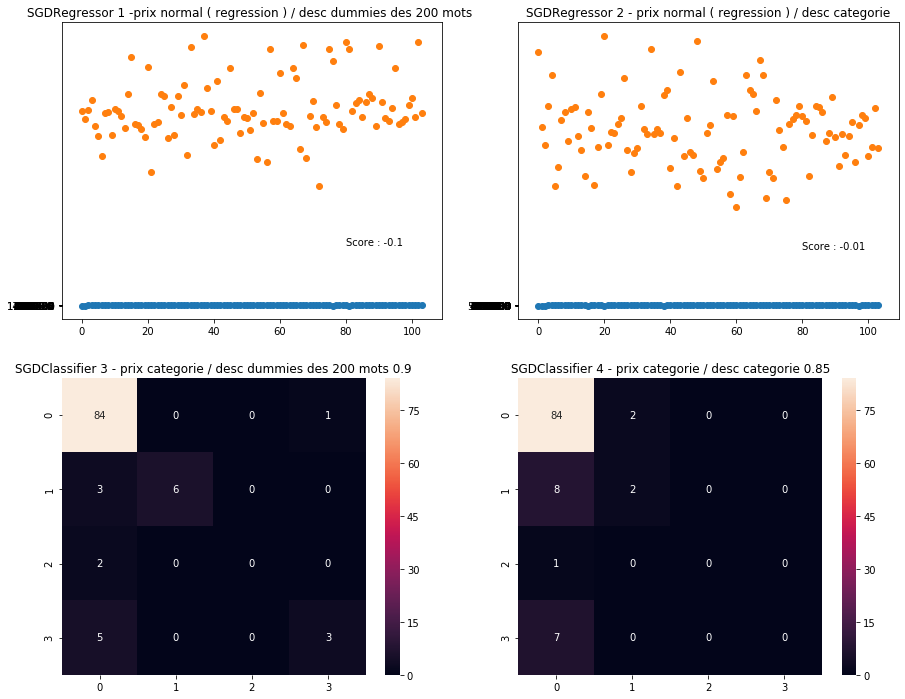

In [113]:
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
plt.scatter(range(len(ytest1)),ytest1)
plt.scatter(range(len(ypredSGDRegressor1)),ypredSGDRegressor1)
plt.text(80,10000,"Score : "+str(round(SGDRegressor1.best_estimator_.score(Xtest1,ytest1),2)))
plt.title("SGDRegressor 1 -prix normal ( regression ) / desc dummies des 200 mots ")
plt.subplot(2,2,2)
plt.scatter(range(len(ytest2)),ytest2)
plt.scatter(range(len(ypredSGDRegressor2)),ypredSGDRegressor2)
plt.text(80,10000,"Score : "+str(round(SGDRegressor2.best_estimator_.score(Xtest2,ytest2),2)))
plt.title("SGDRegressor 2 - prix normal ( regression ) / desc categorie")
plt.subplot(2,2,3)
conf3 = confusion_matrix(ytest3,ypredSGDClassifier3)
sns.heatmap(conf3,annot=True)
plt.title("SGDClassifier 3 - prix categorie / desc dummies des 200 mots "+ str(round(SGDClassifier3.best_score_,2)))
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.subplot(2,2,4)
conf4 = confusion_matrix(ytest4,ypredSGDClassifier4)
sns.heatmap(conf4,annot=True)
plt.plot(label="Score : "+str(SGDClassifier4.best_score_))
plt.title("SGDClassifier 4 - prix categorie / desc categorie "+ str(round(SGDClassifier4.best_score_,2)))
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

In [104]:
print(classification_report(ytest3,ypredXgboost3))
print(classification_report(ytest4,ypredXgboost4))

                         precision    recall  f1-score   support

              25a60Kans       0.89      0.99      0.94        85
             60a200Kans       1.00      0.67      0.80         9
millionnairestoutlesans       0.00      0.00      0.00         2
          moinsde25Kans       0.75      0.38      0.50         8

               accuracy                           0.89       104
              macro avg       0.66      0.51      0.56       104
           weighted avg       0.87      0.89      0.87       104

                         precision    recall  f1-score   support

              25a60Kans       0.91      0.92      0.91        86
             60a200Kans       0.47      0.70      0.56        10
millionnairestoutlesans       0.00      0.00      0.00         1
          moinsde25Kans       1.00      0.29      0.44         7

               accuracy                           0.85       104
              macro avg       0.59      0.48      0.48       104
           weighted 

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [111]:
print('SGDRegressor 1',SGDRegressor1.best_params_)
print('SGDRegressor 2',SGDRegressor2.best_params_)
print('SGDClassifier 3',SGDClassifier3.best_params_)
print('SGDClassifier 4',SGDClassifier4.best_params_)

SGDRegressor 1 {'alpha': 0.0001, 'learning_rate': 'optimal', 'loss': 'epsilon_insensitive', 'penalty': 'l2'}
SGDRegressor 2 {'alpha': 0.0001, 'learning_rate': 'optimal', 'loss': 'epsilon_insensitive', 'penalty': 'l2'}
SGDClassifier 3 {'alpha': 0.01, 'l1_ratio': 0.9}
SGDClassifier 4 {'alpha': 1e-06, 'l1_ratio': 0.5}


<h1 style='text-align:center'>Lasso / SVC </h1>

In [17]:
parametre = {
    'alpha': [1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06],
    'precompute': [True, False],
    'selection': ['cyclic', 'random']
}
lasso = Lasso()
lasso1 = GridSearchCV(lasso, parametre,verbose=1,n_jobs=4)
lasso1.fit(Xtrain1, ytrain1)
ypredlasso1 = lasso1.predict(Xtest1)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
lasso2 = GridSearchCV(lasso, parametre,verbose=1,n_jobs=4)
lasso2.fit(Xtrain2, ytrain2)
ypredlasso2 = lasso2.predict(Xtest2)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
parametre = {
    'C': [0.1,1, 10, 100],
    'gamma': [1,0.1,0.01,0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}
svc = SVC()
SvectorC3 = GridSearchCV(svc, parametre,verbose=1,n_jobs=4)
SvectorC3.fit(Xtrain3, ytrain3)
ypredSvectorC3 = SvectorC3.predict(Xtest3)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
SvectorC4 = GridSearchCV(svc, parametre,verbose=1,n_jobs=4)
SvectorC4.fit(Xtrain4, ytrain4)
ypredSvectorC4 = SvectorC4.predict(Xtest4)

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=4)]: Done  72 out of  72 | elapsed:    0.3s finished
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=4)]: Done  72 out of  72 | elapsed:    0.3s finished
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=4)]: Done 116 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 144 out of 144 | elapsed:    0.9s finished
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=4

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=4)]: Done 130 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 144 out of 144 | elapsed:    1.3s finished
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


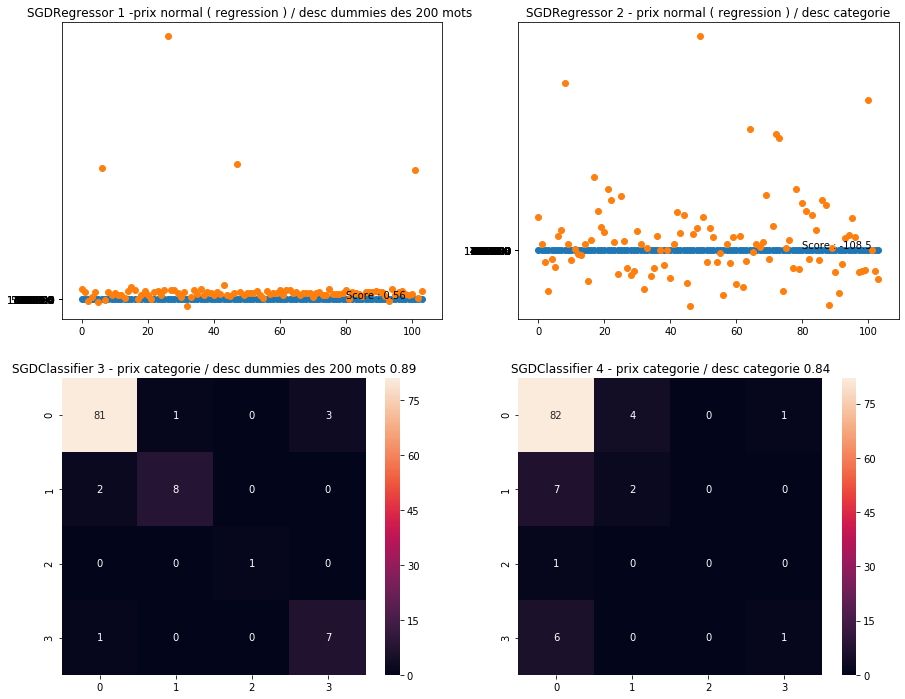

In [19]:
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
plt.scatter(range(len(ytest1)),ytest1)
plt.scatter(range(len(ypredlasso1)),ypredlasso1)
plt.text(80,10000,"Score : "+str(round(lasso1.best_estimator_.score(Xtest1,ytest1),2)))
plt.title("SGDRegressor 1 -prix normal ( regression ) / desc dummies des 200 mots ")
plt.subplot(2,2,2)
plt.scatter(range(len(ytest2)),ytest2)
plt.scatter(range(len(ypredlasso2)),ypredlasso2)
plt.text(80,10000,"Score : "+str(round(lasso2.best_estimator_.score(Xtest2,ytest2),2)))
plt.title("SGDRegressor 2 - prix normal ( regression ) / desc categorie")
plt.subplot(2,2,3)
conf3 = confusion_matrix(ytest3,ypredSvectorC3)
sns.heatmap(conf3,annot=True)
plt.title("SGDClassifier 3 - prix categorie / desc dummies des 200 mots "+ str(round(SvectorC3.best_score_,2)))
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.subplot(2,2,4)
conf4 = confusion_matrix(ytest4,ypredSvectorC4)
sns.heatmap(conf4,annot=True)
plt.plot(label="Score : "+str(SvectorC4.best_score_))
plt.title("SGDClassifier 4 - prix categorie / desc categorie "+ str(round(SvectorC4.best_score_,2)))
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

In [21]:
print(classification_report(ytest3,ypredSvectorC3))
print(classification_report(ytest4,ypredSvectorC4))

                         precision    recall  f1-score   support

              25a60Kans       0.96      0.95      0.96        85
             60a200Kans       0.89      0.80      0.84        10
millionnairestoutlesans       1.00      1.00      1.00         1
          moinsde25Kans       0.70      0.88      0.78         8

               accuracy                           0.93       104
              macro avg       0.89      0.91      0.89       104
           weighted avg       0.94      0.93      0.93       104

                         precision    recall  f1-score   support

              25a60Kans       0.85      0.94      0.90        87
             60a200Kans       0.33      0.22      0.27         9
millionnairestoutlesans       0.00      0.00      0.00         1
          moinsde25Kans       0.50      0.14      0.22         7

               accuracy                           0.82       104
              macro avg       0.42      0.33      0.35       104
           weighted 

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [22]:
print('SGDRegressor 1',lasso1.best_params_)
print('SGDRegressor 2',lasso2.best_params_)
print('SGDClassifier 3',SvectorC3.best_params_)
print('SGDClassifier 4',SvectorC4.best_params_)

SGDRegressor 1 {'alpha': 1e-05, 'precompute': False, 'selection': 'random'}
SGDRegressor 2 {'alpha': 0.001, 'precompute': True, 'selection': 'random'}
SGDClassifier 3 {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
SGDClassifier 4 {'C': 1, 'gamma': 0.1, 'kernel': 'sigmoid'}


<h1 style='text-align:center'>Ridge / Nayves Bayes </h1>

In [42]:
parametre = {
    'alpha':[0.02, 0.024, 0.025, 0.026, 0.03],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg']
}
ridge = Ridge()
ridge1 = GridSearchCV(ridge, parametre,verbose=1,n_jobs=4)
ridge1.fit(Xtrain1, ytrain1)
ypredridge1 = ridge1.predict(Xtest1)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
ridge2 = GridSearchCV(ridge, parametre,verbose=1,n_jobs=4)
ridge2.fit(Xtrain2, ytrain2)
ypredridge2 = ridge2.predict(Xtest2)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
parametre = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
gnb = GaussianNB()
gnb3 = GridSearchCV(gnb, parametre,verbose=1,n_jobs=4)
gnb3.fit(Xtrain3, ytrain3)
ypredgnb3 = gnb3.predict(Xtest3)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
gnb4 = GridSearchCV(gnb, parametre,verbose=1,n_jobs=4)
gnb4.fit(Xtrain4, ytrain4)
ypredgnb4 = gnb4.predict(Xtest4)

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:    0.4s finished
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:    0.4s finished
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=4)]: Done 235 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.9s finished
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=4

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=4)]: Done 250 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    1.1s finished
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


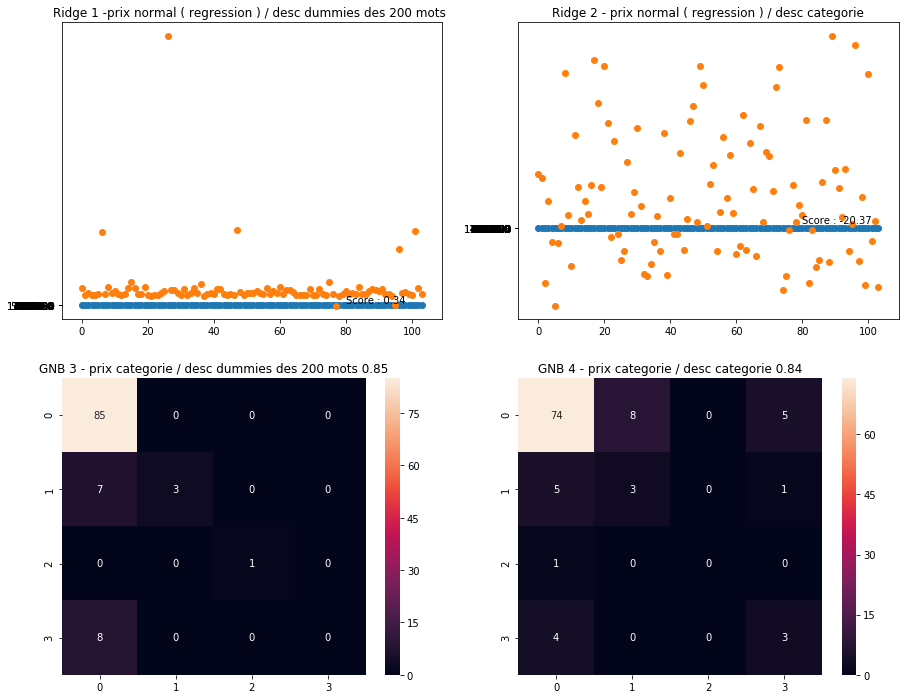

In [47]:
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
plt.scatter(range(len(ytest1)),ytest1)
plt.scatter(range(len(ypredridge1)),ypredridge1)
plt.text(80,10000,"Score : "+str(round(ridge1.best_estimator_.score(Xtest1,ytest1),2)))
plt.title("Ridge 1 -prix normal ( regression ) / desc dummies des 200 mots ")
plt.subplot(2,2,2)
plt.scatter(range(len(ytest2)),ytest2)
plt.scatter(range(len(ypredridge2)),ypredridge2)
plt.text(80,10000,"Score : "+str(round(ridge2.best_estimator_.score(Xtest2,ytest2),2)))
plt.title("Ridge 2 - prix normal ( regression ) / desc categorie")
plt.subplot(2,2,3)
conf3 = confusion_matrix(ytest3,ypredgnb3)
sns.heatmap(conf3,annot=True)
plt.title("GNB 3 - prix categorie / desc dummies des 200 mots "+ str(round(gnb3.best_score_,2)))
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.subplot(2,2,4)
conf4 = confusion_matrix(ytest4,ypredgnb4)
sns.heatmap(conf4,annot=True)
plt.plot(label="Score : "+str(gnb4.best_score_))
plt.title("GNB 4 - prix categorie / desc categorie "+ str(round(gnb4.best_score_,2)))
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

In [45]:
print(classification_report(ytest3,ypredgnb3))
print(classification_report(ytest4,ypredgnb4))

                         precision    recall  f1-score   support

              25a60Kans       0.85      1.00      0.92        85
             60a200Kans       1.00      0.30      0.46        10
millionnairestoutlesans       1.00      1.00      1.00         1
          moinsde25Kans       0.00      0.00      0.00         8

               accuracy                           0.86       104
              macro avg       0.71      0.57      0.60       104
           weighted avg       0.80      0.86      0.81       104

                         precision    recall  f1-score   support

              25a60Kans       0.88      0.85      0.87        87
             60a200Kans       0.27      0.33      0.30         9
millionnairestoutlesans       0.00      0.00      0.00         1
          moinsde25Kans       0.33      0.43      0.38         7

               accuracy                           0.77       104
              macro avg       0.37      0.40      0.39       104
           weighted 

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [48]:
print('ridge 1',ridge1.best_params_)
print('ridge 2',ridge2.best_params_)
print('Naives Bayesienne 3',gnb3.best_params_)
print('Naives Bayesienne 4',gnb4.best_params_)

ridge 1 {'alpha': 0.03, 'solver': 'lsqr'}
ridge 2 {'alpha': 0.03, 'solver': 'auto'}
Naives Bayesienne 3 {'var_smoothing': 0.15199110829529336}
Naives Bayesienne 4 {'var_smoothing': 0.0001873817422860383}
